In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

RED_COLORS = ["#DB7093","#FF4500","#FF6347","#800000","#8B0000","#FF0000","#B22222","#DC143C", "#CD5C5C","#F08080","#E9967A","#FA8072","#FFA07A"]
BLUE_COLORS = ["#4169E1", "#483D8B", "#6A5ACD", "#5F9EA0", "#6495ED", "#1E90FF", "#B0C4DE", "#00BFFF", "#87CEFA", "#191970", "#B0E0E6"]

In [2]:
def visualize_two_sets_timestep(path_1, path_2, combined=False, average=True):
    path_to_experiment_1 = '/home/batu/Desktop/Winter_2019/Retro/Results/' + path_1
    exp_1_runs = glob.glob(f'{path_to_experiment_1}/**/monitor.csv', recursive=True)

    path_to_experiment_2 = '/home/batu/Desktop/Winter_2019/Retro/Results/' + path_2
    exp_2_runs = glob.glob(f'{path_to_experiment_2}/**/monitor.csv', recursive=True)
    
    print(f"Found {len(exp_1_runs)} runs in {path_1}.")
    print(f"Found {len(exp_2_runs)} runs in {path_2}.")  
    
    all_runs_1 = []
    for index, run in enumerate(exp_1_runs):
        run_data = np.genfromtxt(run, delimiter=',')[1:]
        print(f"The {index}th run in experiment 1  has {len(run_data)} steps with a max of {np.max(np.array(run_data).transpose()[0]):.2f}.")
        all_runs_1.append(run_data)
    all_runs_1 = np.array(all_runs_1)
    print()
    
    all_runs_2 = []
    for index, run in enumerate(exp_2_runs):
        run_data = np.genfromtxt(run, delimiter=',')[1:]
        print(f"The {index}th run in experiment 2 has {len(run_data)} steps with a max of {np.max(np.array(run_data).transpose()[0]):.2f}.")
        all_runs_2.append(run_data)
    all_runs_2 = np.array(all_runs_2)
    
    fig, ax = plt.subplots()
    ax.set(xlabel='Timesteps', ylabel='Reward', title=f'{path_1}')
    for _, run in enumerate(all_runs_1):
        reward = run.transpose()[0]
        steps = np.cumsum(run.transpose()[1])
        ax.plot(steps, reward, color=RED_COLORS[_])
    if not combined:    
        plt.show()  
        fig, ax = plt.subplots()
        ax.grid()
    for _, run in enumerate(all_runs_2):
        reward = run.transpose()[0]
        steps = np.cumsum(run.transpose()[1])
        ax.plot(steps, reward, color=BLUE_COLORS[_])
    ax.set(xlabel='Timesteps', ylabel='Reward', title=f'{path_1}')
    ax.grid()
    plt.show()
  

In [11]:
def vis_two_sets(path_1, path_2, combined=False, average=True):
    path_to_experiment_1 = '/home/batu/Desktop/Winter_2019/Retro/Results/' + path_1
    exp_1_runs = glob.glob(f'{path_to_experiment_1}/**/monitor.csv', recursive=True)

    path_to_experiment_2 = '/home/batu/Desktop/Winter_2019/Retro/Results/' + path_2
    exp_2_runs = glob.glob(f'{path_to_experiment_2}/**/monitor.csv', recursive=True)
    
    print(f"Found {len(exp_1_runs)} runs in {path_1}.")
    print(f"Found {len(exp_2_runs)} runs in {path_2}.")  
    
    all_runs_1 = []
    for index, run in enumerate(exp_1_runs):
        run_data = np.genfromtxt(run, delimiter=',')[1:]
        print(f"The {index}th run in experiment 1  has {len(run_data)} steps with a max of {np.max(np.array(run_data).transpose()[0]):.2f}.")
        all_runs_1.append(run_data)
    all_runs_1 = np.array(all_runs_1)
    print()
    
    all_runs_2 = []
    for index, run in enumerate(exp_2_runs):
        run_data = np.genfromtxt(run, delimiter=',')[1:]
        print(f"The {index}th run in experiment 2 has {len(run_data)} steps with a max of {np.max(np.array(run_data).transpose()[0]):.2f}.")
        all_runs_2.append(run_data)
    all_runs_2 = np.array(all_runs_2)
    
    if average and combined:
        fig, ax = plt.subplots()
        colors = ["#FFA07A", "#1E90FF"]
        ax.set(xlabel='Reset Count', ylabel='Reward', title=f'Combined results')
        ax.grid()
        for name, all_runs in [(0, all_runs_1), (1, all_runs_2)]:
            max_1 = max([len(run) for run in all_runs])    
            all_runs_padded = []
            for run in all_runs:
                pad = np.empty((max_1 - len(run), 3,))
                pad[:] = np.nan
                padded = np.concatenate((run,pad))
                all_runs_padded.append(padded)
            all_runs_padded = np.array(all_runs_padded)

            means = np.nanmean(all_runs_padded, axis=0)
            stds = np.nanstd(all_runs_padded, axis=0)
            mean_rewards = means.transpose()[0]
            std_rewards = stds.transpose()[0]        
    
            reward = mean_rewards
            episodes = np.arange(len(mean_rewards))
            ax.plot(episodes, reward, color=RED_COLORS[0])
            ax.fill_between(episodes, reward+std_rewards, reward-std_rewards, color=colors[name],  alpha=0.40) 

        return
    
    if average:
        for name, all_runs in [(path_1, all_runs_1), (path_2, all_runs_2)]:
            max_1 = max([len(run) for run in all_runs])    
            all_runs_padded = []
            for run in all_runs:
                pad = np.empty((max_1 - len(run), 3,))
                pad[:] = np.nan
                padded = np.concatenate((run,pad))
                all_runs_padded.append(padded)
            all_runs_padded = np.array(all_runs_padded)

            means = np.nanmean(all_runs_padded, axis=0)
            stds = np.nanstd(all_runs_padded, axis=0)
            mean_rewards = means.transpose()[0]
            std_rewards = stds.transpose()[0]        
            fig, ax = plt.subplots()
            ax.set(xlabel='Reset Count', ylabel='Reward', title=f'{name}')
            reward = mean_rewards
            episodes = np.arange(len(mean_rewards))
            ax.plot(episodes, reward, color=RED_COLORS[0])
            ax.fill_between(episodes, reward+std_rewards, reward-std_rewards, color="#FFA07A",  alpha=0.40) 
            ax.grid()
        return


    fig, ax = plt.subplots()
    for _, run in enumerate(all_runs_1):
        reward = run.transpose()[0]
        steps = np.arange(len(run.transpose()[1]))
        ax.plot(steps, reward, color=RED_COLORS[_])
    if not combined:    
        plt.show()  
        fig, ax = plt.subplots()
        ax.grid()
    for _, run in enumerate(all_runs_2):
        reward = run.transpose()[0]
        steps = np.arange(len(run.transpose()[1]))
        ax.plot(steps, reward, color=BLUE_COLORS[_])
    ax.set(xlabel='Reset Count', ylabel='Reward', title=f'{path_1}')
    ax.grid()
    plt.show()
  

Found 4 runs in EarlierExperiments/1_NoTreatment.
Found 4 runs in EarlierExperiments/1_SnapshotTreatment.
The 0th run in experiment 1  has 51 steps with a max of 2625.00.
The 1th run in experiment 1  has 51 steps with a max of 2322.00.
The 2th run in experiment 1  has 56 steps with a max of 1862.00.
The 3th run in experiment 1  has 26 steps with a max of 1294.00.

The 0th run in experiment 2 has 74 steps with a max of 2135.00.
The 1th run in experiment 2 has 29 steps with a max of 2078.00.
The 2th run in experiment 2 has 62 steps with a max of 2085.00.
The 3th run in experiment 2 has 9 steps with a max of 20.00.


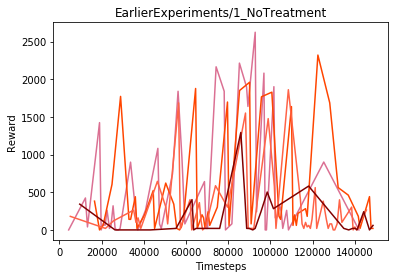

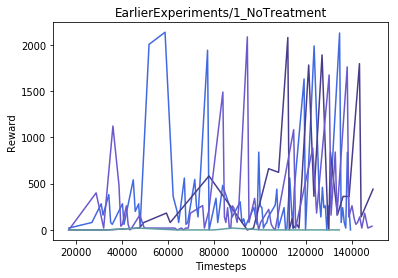

In [14]:
visualize_two_sets_timestep("EarlierExperiments/1_NoTreatment", "EarlierExperiments/1_SnapshotTreatment",
                   combined=False)

Found 4 runs in EarlierExperiments/1_NoTreatment.
Found 4 runs in EarlierExperiments/1_SnapshotTreatment.
The 0th run in experiment 1  has 51 steps with a max of 2625.00.
The 1th run in experiment 1  has 51 steps with a max of 2322.00.
The 2th run in experiment 1  has 56 steps with a max of 1862.00.
The 3th run in experiment 1  has 26 steps with a max of 1294.00.

The 0th run in experiment 2 has 74 steps with a max of 2135.00.
The 1th run in experiment 2 has 29 steps with a max of 2078.00.
The 2th run in experiment 2 has 62 steps with a max of 2085.00.
The 3th run in experiment 2 has 9 steps with a max of 20.00.


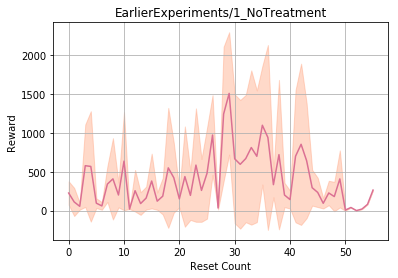

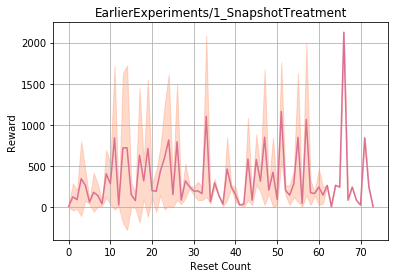

In [17]:
vis_two_sets("EarlierExperiments/1_NoTreatment", "EarlierExperiments/1_SnapshotTreatment",
                   combined=False, average=True)